# Predictions



## Acknowledgment 

Some of the content here is based on [Computational and Inferential Thinking: The Foundations of Data Science](https://inferentialthinking.com/chapters/intro.html), by A. Adhikari, J. DeNero, D. Wagner.

On the other hand, this text uses its own module `datascience` for data frame manipulations, while we will use pandas, which is the most commonly used library for data frames in Python.

## Importing Modules

Let's start by importing the necessary modules:

In [1]:
import numpy as np

import pandas as pd
# pd.options.future.infer_string = True
# pd.options.mode.copy_on_write = True

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 6)  # default figure size
plt.style.use("ggplot")  # style sheet

from tqdm.notebook import tqdm

## Introduction

We will study how different attributes of the data can be correlated and how we can use one of them (or more) to predict another.

For instance:

* Can we predict the height of a child based on the height of the parents?
* Can we predict the change of approval rating of a US president based on the change of fuel prices?
* Can we predict the price of a home (in a particular area) based on its square footage?
* Can we predict the birth weight of a child based on the number of gestational days?



## Correlation

We say that two attributes (or variables) are *correlated* if a change one usually comes with a change on the other.  Thus, correlation is a special kind of association.  (And remember that *association does not imply causation*, and neither does correlation!)

Here, though, we will talk about *linear correlation*: this means that the ratio between differences of the respective attributes for any pair of distinct pieces of data is always close to some constant.

Mathematically, it means that there is some constant $k$, such that if the attributes/variables are

$$
\{x_1, x_2, \ldots, x_n  \}
$$

and 

$$
\{y_1, y_2, \ldots, y_n  \}
$$

then for any pair of indices $i$ and $j$ (with $i \neq j$), we have

$$
\frac{y_j - y_i}{x_j - x_i} \approx k.
$$

Geometrically, this means that the points on the scatter plot of of these two variables, i.e., the points $(x_i, y_i)$ for $i=1, 2, \ldots, n$, lie close to a line (whose slope would then be the constant $k$ above).

Therefore a *linear* correlation is a special kind of correlation.

Let's make this more explicit by looking at a concrete example.  Ultimately, we want to see *if we can make good predictions for the birth weight of babies based on the number of gestational days*, but we will start by just looking for a linear correlation.

The file [baby.csv](baby.csv) (provided with this notebook) contains the following variables for 1,174 mother-baby pairs:

- birth weight in ounces, 
- the number of gestational days, 
- the mother's age, 
- the mother's height in inches, 
- pregnancy weight in pounds, 
- and whether or not the mother smoked during pregnancy.

In [2]:
births = pd.read_csv("baby.csv")
births

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False
...,...,...,...,...,...,...
1169,113,275,27,60,100,False
1170,128,265,24,67,120,False
1171,130,291,30,65,150,True
1172,125,281,21,65,110,False


Let's approach this visually, and look at the scatter plot for the attributes birth weight and number of gestational days:

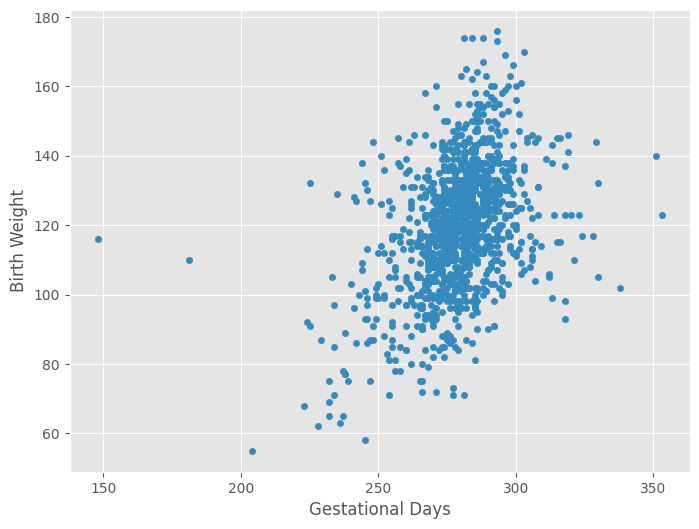

In [3]:
births.plot("Gestational Days", "Birth Weight", kind="scatter");

Firstly, we see some outliers to the left and to the right.  The middle part *could* perhaps be distributed about a straight line, though.

We can remove this outliers, as there are probably some extra factors involved, and they correspond to rare events with too short or too long gestational periods.  

Let's then focus on the range between 210 and 340 gestational days:

In [4]:
births2 = births.query("210  <= `Gestational Days` <= 340")

Note we only lost five individuals with this filtering:

In [5]:
len(births) - len(births2)

5

Let's see the scatter plot for this restricted data:

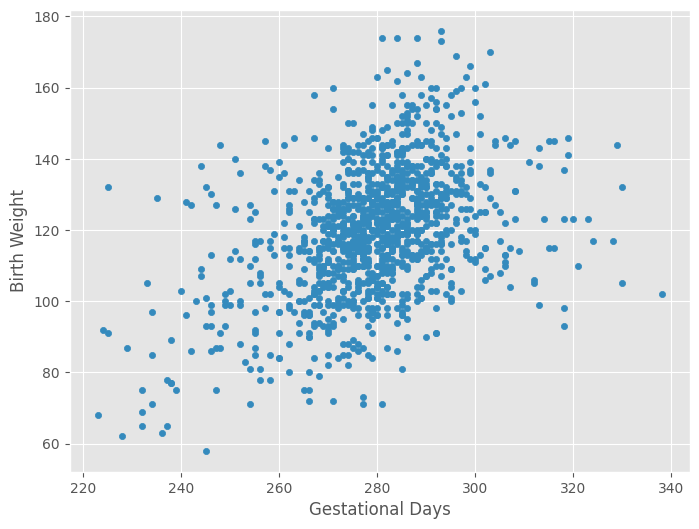

In [6]:
births2.plot("Gestational Days", "Birth Weight", kind="scatter");

With some fiddling we can see a line passing through the points:

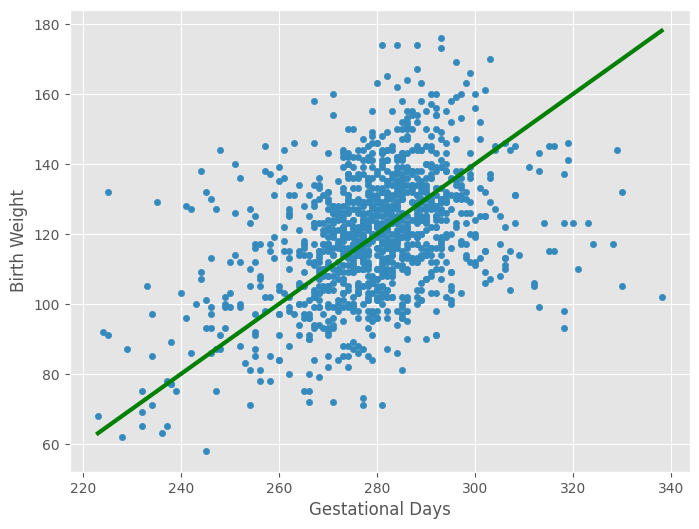

In [7]:
# guess slope and intercept for the line
# guessed_slope = 0.4
# guessed_intercept = 5

guessed_slope = 1
guessed_intercept = -160

# minimum and maximum values for x
minx = births2["Gestational Days"].min()
maxx = births2["Gestational Days"].max()

# initialize plot
fig, ax = plt.subplots()

# draw the line
xs = np.array([minx, maxx])
ys = guessed_slope * xs + guessed_intercept

ax.plot(xs, ys, c="green", linewidth=3)

# scatter plot
births2.plot("Gestational Days", "Birth Weight", kind="scatter", ax=ax);

Of course, this line is not perfect, as there certainly other factors, besides the number of gestational days, that will affect the birth weight, such as genetics and mothers diet.  But maybe this gives us a *baseline*, while other factors add some variation from it.

## The correlation coefficient

The *correlation coefficient*, usually denoted by $r$, measures the strength of the *linear* relationship between two attributes/variables.

Here are some mathematical facts about $r$ that we will just observe by simulation.

- $r$ is a number between $-1$ and $1$.
- $r$ measures the extent to which the scatter plot clusters around a straight line.
- $r = 1$ if the scatter diagram is a perfect straight line sloping upwards, and $r = -1$ if the scatter diagram is a perfect straight line sloping downwards.
- $r = 0$ if no linear correlation can be detected from the data.

For the sake of brevity, we will not discuss how one can "manually" compute this number here, but, of course, pandas can compute it for us.  

For instance, if I want to see the correlation coefficient between the number of gestational days and the birth weight in our `births2` data frame:

In [8]:
r = births2["Gestational Days"].corr(births2["Birth Weight"])
r

0.41780780746725565

Indeed, this coefficient is *positive*, meaning that an increase in the number of gestational days, result in an increase on the birth weight.  (The graph slopes upward.)  Also the number is sufficiently higher than $0$ for us to detect some linear correlation, but not so close to $1$, since there is a lot of variation for the same number of gestational days.

We can investigate the correlations between all variables:

In [9]:
births2.corr()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
Birth Weight,1.000000,0.417808,0.031278,0.205045,0.159255,-0.250633
Gestational Days,0.417808,1.000000,-0.050142,0.078906,0.036033,-0.072549
Maternal Age,0.031278,-0.050142,1.000000,-0.007009,0.146711,-0.067109
Maternal Height,0.205045,0.078906,-0.007009,1.000000,0.436040,0.019122
Maternal Pregnancy Weight,0.159255,0.036033,0.146711,0.436040,1.000000,-0.060371
Maternal Smoker,-0.250633,-0.072549,-0.067109,0.019122,-0.060371,1.000000


If we want the correlation coefficients only to the birth weight, we can select the corresponding column (or row):

In [10]:
births2.corr()[["Birth Weight"]]

,Birth Weight
Birth Weight,1.000000
Gestational Days,0.417808
Maternal Age,0.031278
Maternal Height,0.205045
Maternal Pregnancy Weight,0.159255
Maternal Smoker,-0.250633


We can see that indeed the number of gestational days has the strongest correlation to the birth weight, although the maternal height and pregnancy weight seem to have a weaker, but non negligible, correlation:

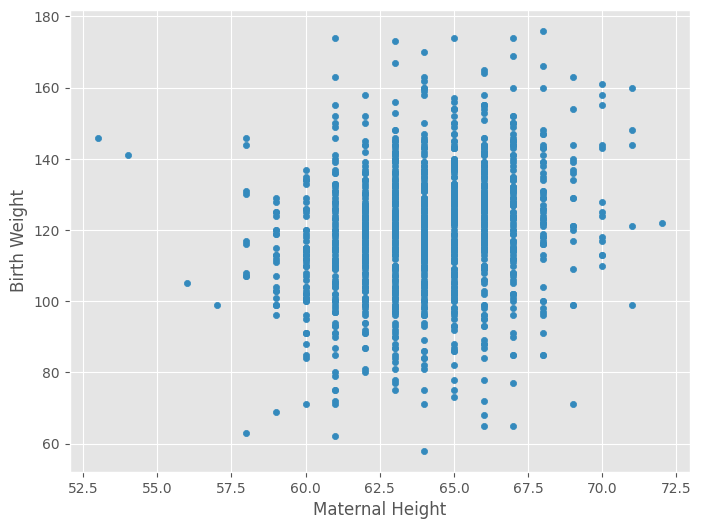

In [11]:
births2.plot("Maternal Height", "Birth Weight", kind="scatter");

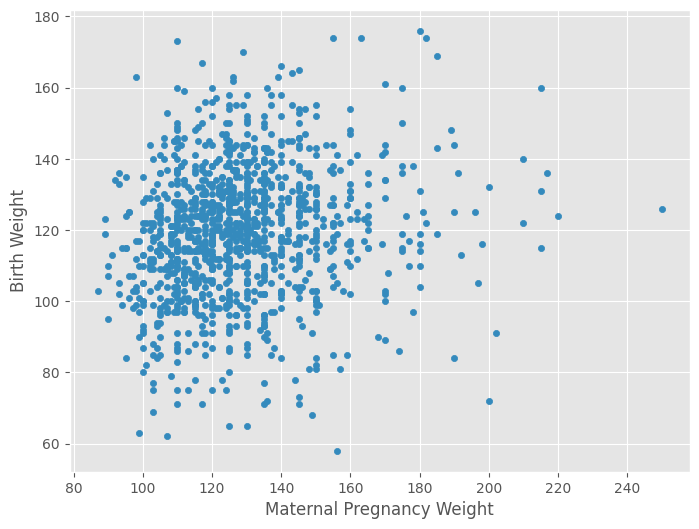

In [12]:
births2.plot("Maternal Pregnancy Weight", "Birth Weight", kind="scatter");

## Regression Line

So, if the data fits around some line, how do we find this line?  We will refer to this line as the *regression line*.

Again, we will omit the (very interesting) math behind this, but we can obtain its formula from the correlation coefficient.

First remember that a line is given by a formula of the form:

$$
y = mx + b
$$

where $m$ is the *slope* of the line and $b$ is the *$y$-intercept* of the line.  

The $y$-intercept simply tells us at which value (of $y$) the line crosses the $y$-axis.

The slope $m$ tells us how steep the line is: 

* if the slope $m$ is *positive*, moving from a point on the line one unit to the left, we have another point on the line $m$ units *up*;
* if the slope $m$ is *negative*, moving from a point on the line one unit to the left, we have another point on the line $|m|$ units *down*.

![slopes](slopes.png)

So, if your data has attributes given by

$$
\mathbf{x} = \{x_1, x_2, \ldots, x_n \}
$$

and

$$
\mathbf{y} = \{y_1, y_2, \ldots, y_n \}
$$

then


$$
\mathbf{\text{slope of the regression line}} ~=~ r \cdot
\frac{\mathrm{std}(\mathbf{y})}{\mathrm{std}(\mathbf{x})}
$$

$$
\mathbf{\text{$y$-intercept of the regression line}} ~=~
\mathrm{aver}(\mathbf{y}) ~-~ \text{slope} \cdot \mathrm{aver}(\mathbf{x}),
$$

where $r$ is the correlation coefficient, $\mathrm{aver}$ is the average function, and $\mathrm{std}$ is the standard deviation function.

So, in this case, since we have the correlation coefficient in `r`:

In [13]:
regression_slope = (
    r * np.std(births2["Birth Weight"]) / np.std(births2["Gestational Days"])
)
regression_inter = (
    np.mean(births2["Birth Weight"]) - regression_slope * np.mean(births2["Gestational Days"])
)

Let's now see the regression line with the scatter plot (and our "guessed line"):

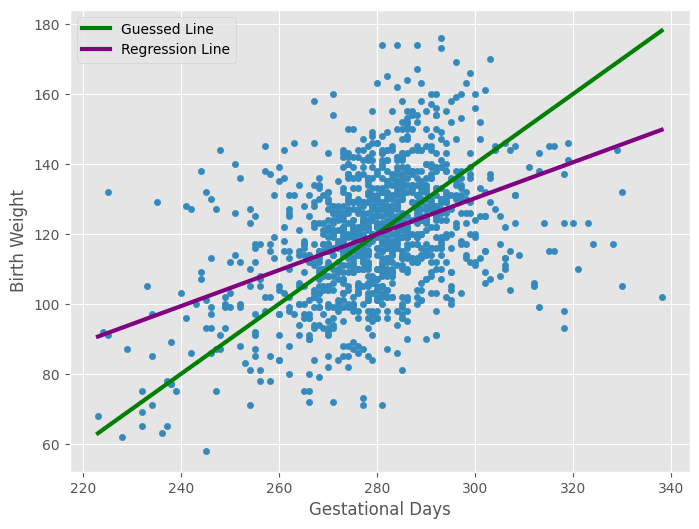

In [14]:
# guessed slope and intercept
guessed_slope = 1
guessed_intercetp = -160

# minimum and maximum values of x
minx = births2["Gestational Days"].min()
maxx = births2["Gestational Days"].max()

# initialize plot
fig, ax = plt.subplots()


xs = np.array([minx, maxx])

# y's for guessed line
ys = guessed_slope * xs + guessed_intercetp

# y's for regression line
reg_ys = regression_slope * xs + regression_inter

ax.plot(xs, ys, c="green", linewidth=3, label="Guessed Line")
ax.plot(xs, reg_ys, c="purple", linewidth=3, label="Regression Line")

# scatter plot
births2.plot("Gestational Days", "Birth Weight", kind="scatter", ax=ax)

plt.legend();

## Predictions with the Regression Line

Now that we have the formula for the regression line, we can use it to make predictions.

If we have a new data point $x$, and want to predict the corresponding $y$ value, we predict

$$
y = \text{slope of regression line} \cdot x + \text{intercept of the regression line}.
$$

So, in our example, if we have a mother about to deliver after $300$ gestational days, we predict that the birth weight is:

In [15]:
gestational_days = 300
regression_slope * gestational_days + regression_inter

130.17400944276076

So, about $130$ ounces.

For $280$ gestational days:

In [16]:
gestational_days = 280
regression_slope * gestational_days + regression_inter

119.90009955598805

About $120$ ounces.

Let's then write a function that does all the job for us: we give a data frame and two columns, and it gives us:

* the correlation coefficient;
* slope of the regression line;
* $y$-intercept of the regression line;
* prediction function (based on the regression line).

In [17]:
def regression_data(df, label_x, label_y):
    """
    Given a data frame and columns labels for the x and y columns,
    computes correlation, slope, intercept, and prediction function.

    INPUTS:
    df: data frame;
    label_x: label for the first variable;
    label_y: label for the second variable.

    OUTPUTS:
    correlation coefficient;
    slope of the regression line;
    y-intercept of the regression line;
    prediction function (based on the regression line).
    """
    r = df[label_x].corr(df[label_y])

    slope = r * df[label_y].std() / df[label_x].std()

    intercept = df[label_y].mean() - slope * df[label_x].mean()

    prediction_fct = lambda x: slope * x + intercept

    return r, slope, intercept, prediction_fct

Let's apply it to our example:

In [18]:
gd_r, gd_slope, gd_inter, gd_pred_fct = regression_data(births2, "Gestational Days", "Birth Weight")

print(f"The correlation coefficient is: {gd_r:>6.2f}.")
print(f"The regression slope is:        {gd_slope:>6.2f}.")
print(f"The regression y-intercept is:  {gd_inter:>6.2f}.")

The correlation coefficient is:   0.42.
The regression slope is:          0.51.
The regression y-intercept is:  -23.93.


And we can use the returned prediction functions to make predictions:

In [19]:
gd_pred_fct(300)

130.17400944276076

In [20]:
gd_pred_fct(280)

119.90009955598805

## Other Attributes

Let's apply this function to Maternal Height and Birth Weight:

In [21]:
mh_r, mh_slope, mh_inter, mh_pred_fct = regression_data(births2, "Maternal Height", "Birth Weight")

print(f"The correlation coefficient is: {mh_r:>6.2f}.")
print(f"The regression slope is:        {mh_slope:>6.2f}.")
print(f"The regression y-intercept is:  {mh_inter:>6.2f}.")

The correlation coefficient is:   0.21.
The regression slope is:          1.48.
The regression y-intercept is:   24.66.


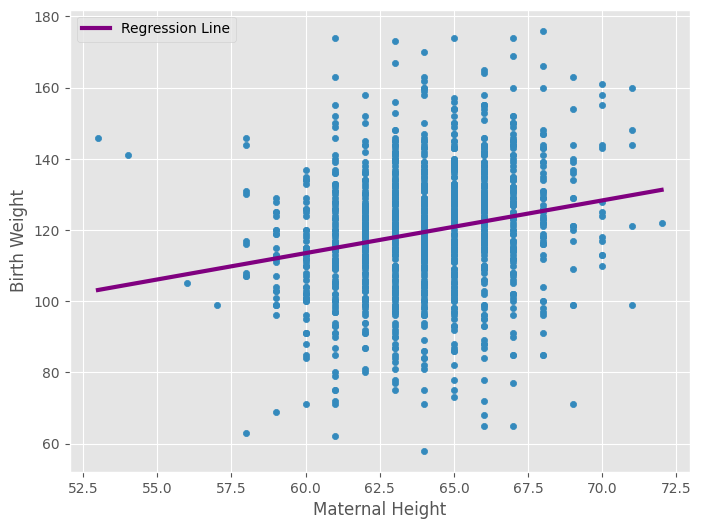

In [22]:
# minimum and maximum values of x
minx = births2["Maternal Height"].min()
maxx = births2["Maternal Height"].max()

# initialize plot
fig, ax = plt.subplots()

# regression line
xs = np.array([minx, maxx])
reg_ys = mh_slope * xs + mh_inter

ax.plot(xs, reg_ys, c="purple", linewidth=3, label="Regression Line")

# scatter plot
births2.plot("Maternal Height", "Birth Weight", kind="scatter", ax=ax)

plt.legend();

Let's see some predictions:

In [23]:
mh_pred_fct(63)

117.96126807296233

In [24]:
mh_pred_fct(67)

123.88519148887399

## Errors

Let's now investigate the errors we made.  We will add predictions to the data frame and their respective errors.

In [25]:
births2_pred = (
    births2[["Gestational Days", "Maternal Height", "Birth Weight"]]  # select columns
    .assign(Predicted_GD=gd_slope * births2["Gestational Days"] + gd_inter)  # prediction using GD
    .assign(Predicted_MH=mh_slope * births2["Maternal Height"] + mh_inter)  # prediction using MH
    .assign(Error_GD=lambda df_: df_["Birth Weight"] - df_["Predicted_GD"])  # error from GD
    .assign(Error_MH=lambda df_: df_["Birth Weight"] - df_["Predicted_MH"])  # error from MH
)

births2_pred

,Gestational Days,Maternal Height,Birth Weight,Predicted_GD,Predicted_MH,Error_GD,Error_MH
0,284,62,120,121.954882,116.480287,-1.954882,3.519713
1,282,64,113,120.927491,119.442249,-7.927491,-6.442249
2,279,64,128,119.386404,119.442249,8.613596,8.557751
3,282,67,108,120.927491,123.885191,-12.927491,-15.885191
4,286,62,136,122.982273,116.480287,13.017727,19.519713
...,...,...,...,...,...,...,...
1169,275,60,113,117.331622,113.518326,-4.331622,-0.518326
1170,265,67,128,112.194667,123.885191,15.805333,4.114809
1171,291,65,130,125.550750,120.923230,4.449250,9.076770
1172,281,65,125,120.413795,120.923230,4.586205,4.076770


We can see that sometimes the error from one prediction is smaller than the other.  How about overall?  How do we measure that?

### The Root Mean Squared Error

The most usual way to measure the error from some prediction function is the use the *root mean squared error (RMSE)*:

* take all errors (i.e., differences between predictions and actual values);
* square them all;
* take the average of these squares;
* take the square root of the average.

Note:

* By squaring the errors we make them all positive, so that there are no cancellations.  (It also diminishes the contributions of small errors and increases the contributions of larger errors).
* By taking the average, we make the number of rows not be a factor, but simply the overall size of the errors.
* By taking the square root, we make this error be in the same unit as the original data.

Let's compute the RMSE for both errors above:

In [26]:
rmse_gd = np.sqrt(np.mean(births2_pred["Error_GD"] ** 2))
rmse_gd

16.58107212861539

In [27]:
rmse_mh = np.sqrt(np.mean(births2_pred["Error_MH"] ** 2))
rmse_mh

17.862559499873

As the higher correlation coefficient already indicated, the number of gestational days indeed gives smaller errors (i.e., smaller RMSE).

Let's see what proportions of the average these errors correspond to:

In [28]:
rmse_gd / births2["Birth Weight"].mean(), rmse_mh / births2["Birth Weight"].mean()

(0.138744306348029, 0.1494673208213846)

## Least RMSE

Is the regression line the *best* possible line, meaning, does it give the least RMSE (for a chosen pair of correlated variables)?  Although we can't get into the mathematics involved in justifying it, the answer is *yes*!

But, if we can't prove it, we can verify it numerically, at least for this example.  We will use [SciPy](https://scipy.org/) to do so.

Note that SciPy does not come with Python, so it needs to be installed separately.  If you have a *vanilla* installation of Python, you can do it by running 

```
pip install scipy
```

from a terminal.

On the other hand, if you installed Anaconda, it should already be available.

We need the function `minimize` from SciPy's `optimize` module:

In [29]:
from scipy.optimize import minimize

We need to pass to `minimize` a function that takes as input a tuple (or list, or array) of parameters and returns a numerical value, and a list with a first *guess* for these parameters, which, if at all possible to know, should not be too far off from the actual parameters that minimize the output of the function.

In our case, the parameters are the slope and $y$-intercept, and the output should be the corresponding RMSE.  On the other hand, there is no need to take the square root here, since the square root is an strictly increasing function.  (So, a minimum MSE corresponds to a minimum RMSE.)  So, we will avoid it here.

Let's write the function:

In [30]:
def gd_birth_linear_rmse(v):
    """
    Given a list v, containing the slope and intercept, computes the mean squared error (MSE)
    of using the corresponding line to make predictions of Birth Weight based on Gestational Days.

    INPUTS:
    v = [m, b], where:
       - m is the slope of the line;
       - b is the y-intercept of the line.

    OUTPUT:
    MSE of the prediction using the line.
    """
    slope = v[0]
    intercept = v[1]
    x = births2["Gestational Days"]
    y = births2["Birth Weight"]
    predicted = slope * x + intercept
    errors = y - predicted
    return np.sqrt(np.mean(errors ** 2))

Let's check the RMSE for the guessed slopes and intercept:

In [31]:
gd_birth_linear_rmse((guessed_slope, guessed_intercetp))

18.086263213364354

And for the regression line:

In [32]:
gd_birth_linear_rmse((gd_slope, gd_inter))

16.58107212861539

As one can see, the regression line gives smaller RMSE.  But let's check it is *the best*, by using SciPy's `minimize`:

In [33]:
gd_res = minimize(gd_birth_linear_rmse, (guessed_slope, guessed_intercetp))

gd_res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 16.581072128687744
        x: [ 5.137e-01 -2.394e+01]
      nit: 6
      jac: [ 4.768e-07 -2.384e-07]
 hess_inv: [[ 7.533e-02 -2.103e+01]
            [-2.103e+01  5.889e+03]]
     nfev: 42
     njev: 14

The output here gives a lot of information.  The first two lines say that the process worked, while the line `x` gives the optimal parameters.  We can extract its values as in a dictionary:

In [34]:
gd_res["x"]

array([  0.51369878, -23.93556083])

Note that these are indeed (very close to) the values we found:

In [35]:
gd_res["x"] - np.array([gd_slope, gd_inter])

array([ 3.28507872e-06, -9.21969254e-04])

The differences are from numerical approximations, but we can see that the results from regression are indeed slightly better.

In [36]:
gd_birth_linear_rmse(gd_res["x"]) - gd_birth_linear_rmse([gd_slope, gd_inter])

7.2354566782451e-11

### Technical Note

Sometimes when using `minimize` we get the message:

`Desired error not necessarily achieved due to precision loss.`

But the values given *might* still be correct.

This is due to some intricacies of the numerical process involved.  But let's not concern ourselves with it here.

### Maternal Height

Let's also check that it works for the maternal height:

In [37]:
def mh_birth_linear_rmse(v):
    """
    Given a list v, containing the slope and intercept, computes the mean squared error (MSE)
    of using the corresponding line to make predictions of Birth Weight based on Maternal Height.

    INPUTS:
    v = [m, b], where:
       - m is the slope of the line;
       - b is the y-intercept of the line.

    OUTPUT:
    MSE of the prediction using the line.
    """
    slope = v[0]
    intercept = v[1]
    x = births2["Maternal Height"]
    y = births2["Birth Weight"]
    predicted = slope * x + intercept
    errors = y - predicted
    return np.sqrt(np.mean(errors ** 2))

Since we don't have a guess, let's just pass zeros for the slope and intercept:

In [38]:
mh_res = minimize(mh_birth_linear_rmse, (0, 0))

mh_res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 17.862559499941515
        x: [ 1.481e+00  2.466e+01]
      nit: 20
      jac: [-1.192e-06  0.000e+00]
 hess_inv: [[ 2.826e+00 -1.808e+02]
            [-1.808e+02  1.159e+04]]
     nfev: 75
     njev: 25

Again, the result is (very close to) what we got from regression:

In [39]:
mh_res["x"] - np.array([mh_slope, mh_inter])

array([-1.95743886e-05,  1.25477351e-03])

So, indeed, we can have some confidence that **the regression line is the line that gives the smallest RMSE**.

## Inference

We are using our data to make predictions, but our data is simply a sample of the whole population, and therefore some variation can be expected from randomness of the sampling.  Hence, if we were to take another sample, our regression line would probably be different (although not by much, most likely).

Let's take this into account, by using the **bootstrap**: if our sample is large enough and was randomly chosen, resampling our sample (allowing repetition) should be close to taking a new sample of the population!

Let's apply this idea to the prediction of the birth weight of a newborn after 300 gestational days.

What we do is resample, take the prediction from regression for each one, collect the results, and give an interval based on the middle $95\%$ values:

In [40]:
number_of_repetitions = 10_000

# values to be used
value = 300
percent = 95

# initialize predictions with zeros
predictions = np.zeros(number_of_repetitions)

for i in tqdm(range(number_of_repetitions)):
    resample = births2.sample(frac=1, replace=True)
    predict_fct = regression_data(resample, "Gestational Days", "Birth Weight")[-1]
    predictions[i] = predict_fct(value)  # add prediction to array

# left and right boundaries for the interval
left_bd = np.percentile(predictions, (100 - percent) / 2)
right_bd = np.percentile(predictions, percent + (100 - percent) / 2)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [41]:
print(f"Original prediction for {value}:  {gd_pred_fct(value):.2f}.")
print(f"Left boundary for mid {percent}%:    {left_bd:.2f}.")
print(f"Right boundary for mid {percent}%:   {right_bd:.2f}.")

Original prediction for 300:  130.17.
Left boundary for mid 95%:    128.30.
Right boundary for mid 95%:   132.09.


## Other Curves

What if the actual relation between the number of gestational days and birth weight is not linear, but follow some other curve.

For example, what if the actual relation is given by a *quadratic function* (whose graph gives a parabola instead of a line):

$$
y = ax^2 + bx + c
$$

In this case, we cannot use (linear) regression, obviously, but we can still use `minimize`:

In [42]:
def birth_quad_rmse(v):
    """
    Given a list v, containing the coefficients of a quadratic function, computes the mean 
    squared error (MSE) of using the corresponding function to make predictions of Birth Weight 
    based on Gestational Days.

    INPUTS:
    v = [a, b, c], where the function is given by a * x**2 + b * x + c.

    OUTPUT:
    MSE of the prediction using the function.
    """
    a, b, c = v
    x = births2["Gestational Days"]
    y = births2["Birth Weight"]
    predicted = a * x**2 + b * x + c
    errors = y - predicted
    return np.sqrt(np.mean(errors ** 2))

As initial guess I will pass the regression line, by making the quadratic coefficient zero:

In [43]:
quad_res = minimize(birth_quad_rmse, (0, gd_slope, gd_inter))

quad_res

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 16.35383104756466
        x: [-6.684e-03  4.211e+00 -5.338e+02]
      nit: 21
      jac: [ 7.878e-03 -3.278e-04 -2.623e-06]
 hess_inv: [[ 9.464e-05 -5.244e-02  7.244e+00]
            [-5.244e-02  2.913e+01 -4.034e+03]
            [ 7.244e+00 -4.034e+03  5.600e+05]]
     nfev: 168
     njev: 41

Note that we do get a message that it might not have worked...  But let's see the resulting RMSE, as again, even if it cannot guarantee it worked, it might have:

In [44]:
quad_param = quad_res["x"]
quad_rmse = birth_quad_rmse(quad_param)

quad_rmse

16.35383104756466

In this case it is not very far from what our regression prediction:

In [45]:
rmse_gd

16.58107212861539

Let's visualize the curves:

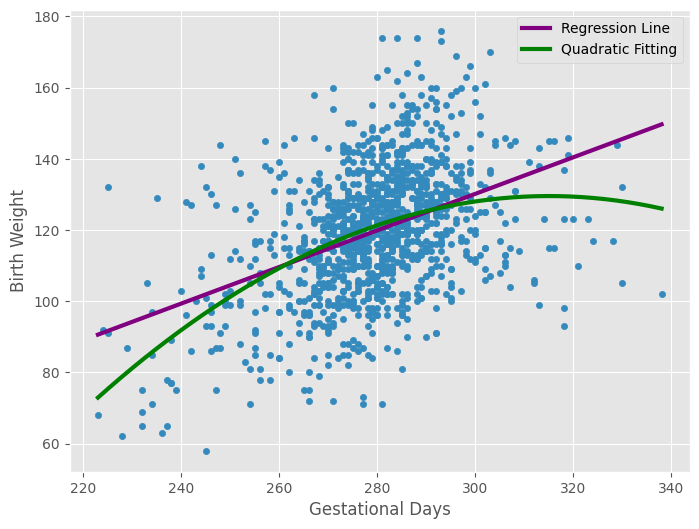

In [46]:
# minimum and maximum values of x
minx = births2["Gestational Days"].min()
maxx = births2["Gestational Days"].max()

# initialize plot
fig, ax = plt.subplots()

# regression line
xs = np.array([minx, maxx])
reg_ys = regression_slope * xs + regression_inter

ax.plot(xs, reg_ys, c="purple", linewidth=3, label="Regression Line")

# parabola
a, b, c = quad_param
xs = np.linspace(minx, maxx, 50)
ys = a * xs**2 + b * xs + c

ax.plot(xs, ys, c="green", linewidth=3, label="Quadratic Fitting")

# scatter plot
births2.plot("Gestational Days", "Birth Weight", kind="scatter", ax=ax)

plt.legend();

### Overfitting

One has to be careful when choosing which curve (line, parabola, etc.) we use in our predictions.  There is a danger getting the curve to fit too close to the *current data*.  In that case, this curve might not not work as well for *predictions*.  This is called [overfitting](https://en.wikipedia.org/wiki/Overfitting).

Ideally, one should have some theoretical reasoning behind the curve used, and use it for our predictions.  The errors observed might simply come from random variation (or the contribution of other variables not taken into account), and might be simply expected.

## Multiple Attributes

It seems that both the number of gestational days and the maternal height affect the birth weight, so we will likely have better results if we can take *both* into account.

In particular, we might have many instances of babies having similar number of gestational day, but with different birth weights.  But these might be due to different maternal heights.

Let's then visualize these all together in a 3D scatter plot:

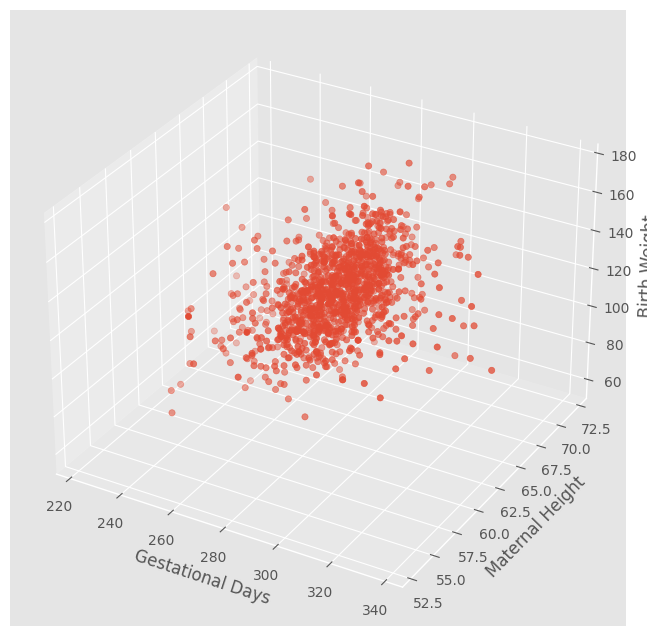

In [47]:
fig = plt.figure(figsize=(8, 8))

# make it 3D
ax = fig.add_subplot(projection="3d")

x = births2["Gestational Days"]
y = births2["Maternal Height"]
z = births2["Birth Weight"]

ax.scatter(x, y, z)

# label the axes
ax.set_xlabel("Gestational Days")
ax.set_ylabel("Maternal Height")
ax.set_zlabel("Birth Weight");

So, instead of fitting a line in this scatter plot, now we want to fit a plane:

$$
z = ax + by + c
$$

We can again use `minimize`!

In [48]:
def mult_rmse(v):
    """
    Given a list v, containing the coefficients for a plane, computes the mean squared error (MSE)
    of using the corresponding plane to make predictions of Birth Weight based on Gestational Days
    and Maternal Height.

    INPUTS:
    v = [a, b, c], where the plane is z = a * x + b * y + c.

    OUTPUT:
    MSE of the prediction using the plane.
    """
    a, b, c = v
    x = births2["Gestational Days"]
    y = births2["Maternal Height"]
    z = births2["Birth Weight"]
    predicted = a * x + b * y + c
    errors = z - predicted
    return np.sqrt(np.mean(errors ** 2))

In [49]:
mult_res = minimize(mult_rmse, (0, 0, 0))

mult_res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 16.279056025321932
        x: [ 4.969e-01  1.251e+00 -9.934e+01]
      nit: 24
      jac: [ 2.146e-06  7.153e-07  0.000e+00]
 hess_inv: [[ 7.194e-02 -4.711e-02 -1.707e+01]
            [-4.711e-02  2.368e+00 -1.384e+02]
            [-1.707e+01 -1.384e+02  1.364e+04]]
     nfev: 112
     njev: 28

Let's see what RMSE we get with this new prediction function:

In [50]:
a, b, c = mult_res["x"]
mult_rmse((a, b, c))

16.279056025321932

So, a small improvement over the one parameter linear fittings:

In [51]:
rmse_gd, rmse_mh

(16.58107212861539, 17.862559499873)

Note that the prediction function is this case is given by:

In [52]:
mult_res["x"]

array([  0.49689413,   1.25064762, -99.3401568 ])

In [53]:
def mult_pred(gestational_days, maternal_height):
    """
    Uses the best fitted plane to give prediction of birth weight based on number of gestational
    days and the maternal height.

    INPUTS:
    gestational_days: numbe of gestational days;
    maternal_height: maternal height in inches.

    OUTPUT:
    Predction for the birth weight based on the fitted plane.
    """
    return  0.49688898 * gestational_days + 1.25060527 * maternal_height + -99.3360023

For instance, we predict that after 280 gestational days, a mother 65 inches tall will give birth to a baby of about 121 ounces:

In [54]:
mult_pred(280, 65)

121.08225465

## More Attributes

The maternal pregnancy weight also affects the birth weight, so we can also use it!

The idea of a *linear fitting*, with multiple variables (or *attributes*), is that each variable is multiplied by a number, we add them all, and add another numbers, as in:

$$
y = a_1 x_1 + a_2 x_2 + \cdots + a_n x_n + b
$$

So, again we follow the same idea using `minimize`:

In [55]:
def mult_rmse2(v):
    """
    Given a list v, containing the coefficients for a linear function, computes the mean squared
    error (MSE) of using the corresponding function to make predictions of Birth Weight based on
    Gestational Days, Maternal Height, and Maternal Pregnancy Weight.

    INPUTS:
    v = [a1, a2, a3, b], where the function is f(x1, x2, x3) = a1 * x1 + a2 * x2 + a3 * x3 + b.

    OUTPUT:
    MSE of the prediction using the plane.
    """
    a1, a2, a3, b = v
    x1 = births2["Gestational Days"]
    x2 = births2["Maternal Height"]
    x3 = births2["Maternal Pregnancy Weight"]
    y = births2["Birth Weight"]
    predicted = a1 * x1 + a2 * x2 + a3 * x3 + b
    errors = y - predicted
    return np.sqrt(np.mean(errors ** 2))

In [56]:
mult_res2 = minimize(mult_rmse2, (0, 0, 0, 0))

mult_res2

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 16.218470409752253
        x: [ 4.967e-01  9.816e-01  7.510e-02 -9.171e+01]
      nit: 25
      jac: [-5.841e-05 -1.168e-05 -3.242e-05 -2.384e-07]
 hess_inv: [[ 7.172e-02 -2.214e-02 -2.160e-03 -1.833e+01]
            [-2.214e-02  3.370e+00 -1.802e-01 -1.865e+02]
            [-2.160e-03 -1.802e-01  4.716e-02  6.058e+00]
            [-1.833e+01 -1.865e+02  6.058e+00  1.631e+04]]
     nfev: 276
     njev: 53

Let's see what RMSE we get now:

In [57]:
a1, a2, a3, b = mult_res2["x"]
mult_rmse2((a1, a2, a3, b))

16.218470409752253

A little better than before...

## Categorical Influence

It seems that whether or not the mother smokes affects the birth weight.  Unfortunately, we cannot incorporate this in the fitting, since it is not numerical.

What we must do in this case, is to have separate prediction functions for the different categories.  

Let's start by splitting the data frame:

In [58]:
smoker = births2.query("`Maternal Smoker`")
nonsmoker = births2.query("not `Maternal Smoker`")

In [59]:
smoker

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
2,128,279,28,64,115,True
3,108,282,23,67,125,True
8,143,299,30,66,136,True
10,144,282,32,64,124,True
11,141,279,23,63,128,True
...,...,...,...,...,...,...
1162,143,281,28,65,135,True
1163,113,287,29,70,145,True
1164,109,244,21,63,102,True
1165,103,278,30,60,87,True


In [60]:
nonsmoker

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
4,136,286,25,62,93,False
5,138,244,33,62,178,False
6,132,245,23,65,140,False
...,...,...,...,...,...,...
1168,132,270,27,65,126,False
1169,113,275,27,60,100,False
1170,128,265,24,67,120,False
1172,125,281,21,65,110,False


Let's use gestational days, maternal height, and pregnancy weight, as before, but now one for each:

In [61]:
def smoker_rmse(v):
    """
    Given a list v, containing the coefficients for a linear function, computes the mean squared 
    error (MSE) of using the corresponding function to make predictions of Birth Weight based on 
    Gestational Days, Maternal Height, and Maternal Pregnancy Weight, assuming that the mother smokes.

    INPUTS:
    v = [a1, a2, a3, b], where the function is f(x1, x2, x3) = a1 * x1 + a2 * x2 + a3 * x3 + b.

    OUTPUT:
    MSE of the prediction using the plane.
    """
    a1, a2, a3, b = v
    x1 = smoker["Gestational Days"]
    x2 = smoker["Maternal Height"]
    x3 = smoker["Maternal Pregnancy Weight"]
    y = smoker["Birth Weight"]
    predicted = a1 * x1 + a2 * x2 + a3 * x3 + b
    errors = y - predicted
    return np.sqrt(np.mean(errors ** 2))

In [62]:
smoker_res = minimize(smoker_rmse, (0, 0, 0, 0))

smoker_res

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 15.565020482967592
        x: [ 5.768e-01  8.847e-01  5.398e-02 -1.100e+02]
      nit: 26
      jac: [ 4.637e-05  1.061e-05  1.943e-05  2.384e-07]
 hess_inv: [[ 4.993e-02 -2.249e-01  3.581e-03  8.632e-02]
            [-2.249e-01  1.211e+00 -1.056e-01 -1.784e+00]
            [ 3.581e-03 -1.056e-01  4.411e-02  3.401e-01]
            [ 8.632e-02 -1.784e+00  3.401e-01  4.021e+01]]
     nfev: 317
     njev: 61

In [63]:
smoker_rmse(smoker_res["x"])

15.565020482967592

In [64]:
def nonsmoker_rmse(v):
    """
    Given a list v, containing the coefficients for a linear function, computes the mean squared
    error (MSE) of using the corresponding function to make predictions of Birth Weight based on
    Gestational Days, Maternal Height, and Maternal Pregnancy Weight, assuming that the mother does
    not smoke.

    INPUTS:
    v = [a1, a2, a3, b], where the function is f(x1, x2, x3) = a1 * x1 + a2 * x2 + a3 * x3 + b.

    OUTPUT:
    MSE of the prediction using the plane.
    """
    a1, a2, a3, b = v
    x1 = nonsmoker["Gestational Days"]
    x2 = nonsmoker["Maternal Height"]
    x3 = nonsmoker["Maternal Pregnancy Weight"]
    y = nonsmoker["Birth Weight"]
    predicted = a1 * x1 + a2 * x2 + a3 * x3 + b
    errors = y - predicted
    return np.sqrt(np.mean(errors ** 2))

In [65]:
nonsmoker_res = minimize(nonsmoker_rmse, (0, 0, 0, 0))

nonsmoker_res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 15.724655962918927
        x: [ 4.074e-01  1.221e+00  5.589e-02 -7.631e+01]
      nit: 24
      jac: [-1.550e-06 -4.768e-07 -4.768e-07  0.000e+00]
 hess_inv: [[ 7.382e-02 -4.839e-02  2.837e-03 -1.795e+01]
            [-4.839e-02  3.082e+00 -1.575e-01 -1.633e+02]
            [ 2.837e-03 -1.575e-01  4.311e-02  3.703e+00]
            [-1.795e+01 -1.633e+02  3.703e+00  1.501e+04]]
     nfev: 150
     njev: 30

In [66]:
nonsmoker_rmse(nonsmoker_res["x"])

15.724655962918927

Hence, by splitting the data fame, we could further improve the errors in each case.

## Comments, Suggestions, Corrections

Please send your comments, suggestions, and corrections to lfinotti@utk.edu.